## Data Visualization using R - Notebook Introduction

***Data visualization*** is perhaps the fastest and most useful way to summarize and learn more about data. When we say Data visualization, the first thing that comes to our mind is creating charts and graphs from data.

In this notebook, we will focus on creating various types of plots and graphs using R packages like `lattice` and `ggplot2`.

## Types of Visualization

Data visualization using R could be categorized into three broader sections -
- Univariate Visualization
- Multivariate Visualization

### What is Univariate Visualization?
Univariate plots are plots of individual attributes without interactions. The main focus is to learn something about the distribution, central tendency and spread of each attributes.

#### Univariate Visualization - Examples
- Barplots
- Scatter plot
- Histograms
- Density Plots
- Box And Whisker Plots
- Missing plot

### What is Multivariate Visualization?
Multivariate Visualization are plots that can help to better understand the interactions between attributes. This is applicable when doing comparison between attributes.

#### Multivariate Visualization - Examples
- Correlation Plot
- Scatterplot Matrix
- Scatterplot Matrix By Class
- Density By Class
- Box And Whisker Plots By Class

## Making Basic Graphics

In [1]:
salaries = read.csv("Salaries.csv")
head(salaries)

rank,discipline,yrs.since.phd,yrs.service,sex,salary
Prof,B,19,18,Male,139750
Prof,B,20,16,Male,173200
AsstProf,B,4,3,Male,79750
Prof,B,45,39,Male,115000
Prof,B,40,41,Male,141500
AssocProf,B,6,6,Male,97000


In [2]:
str(salaries)

'data.frame':	397 obs. of  6 variables:
 $ rank         : Factor w/ 3 levels "AssocProf","AsstProf",..: 3 3 2 3 3 1 3 3 3 3 ...
 $ discipline   : Factor w/ 2 levels "A","B": 2 2 2 2 2 2 2 2 2 2 ...
 $ yrs.since.phd: int  19 20 4 45 40 6 30 45 21 18 ...
 $ yrs.service  : int  18 16 3 39 41 6 23 45 20 18 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 1 ...
 $ salary       : int  139750 173200 79750 115000 141500 97000 175000 147765 119250 129000 ...


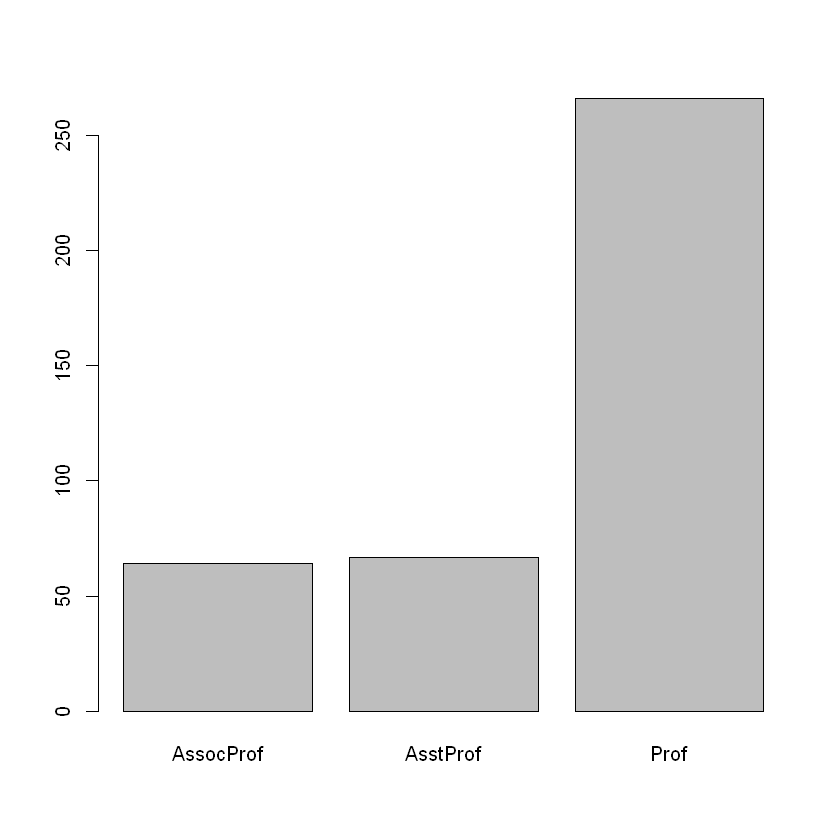

In [3]:
# Bar plot categorical data
plot(salaries$rank)

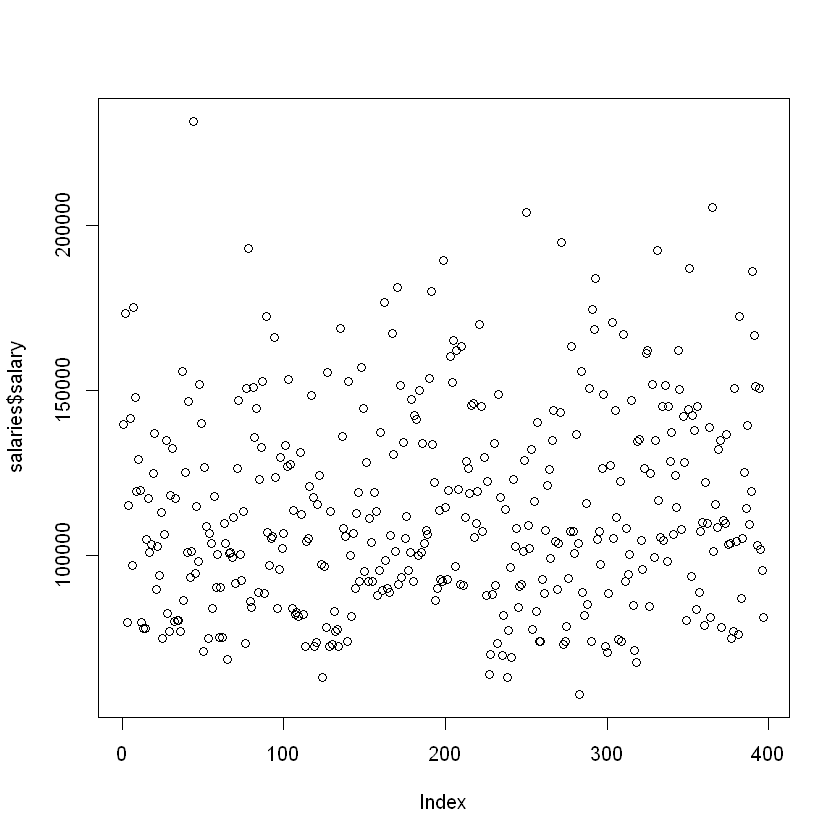

In [4]:
# Scatter plot numerical data
plot(salaries$salary)

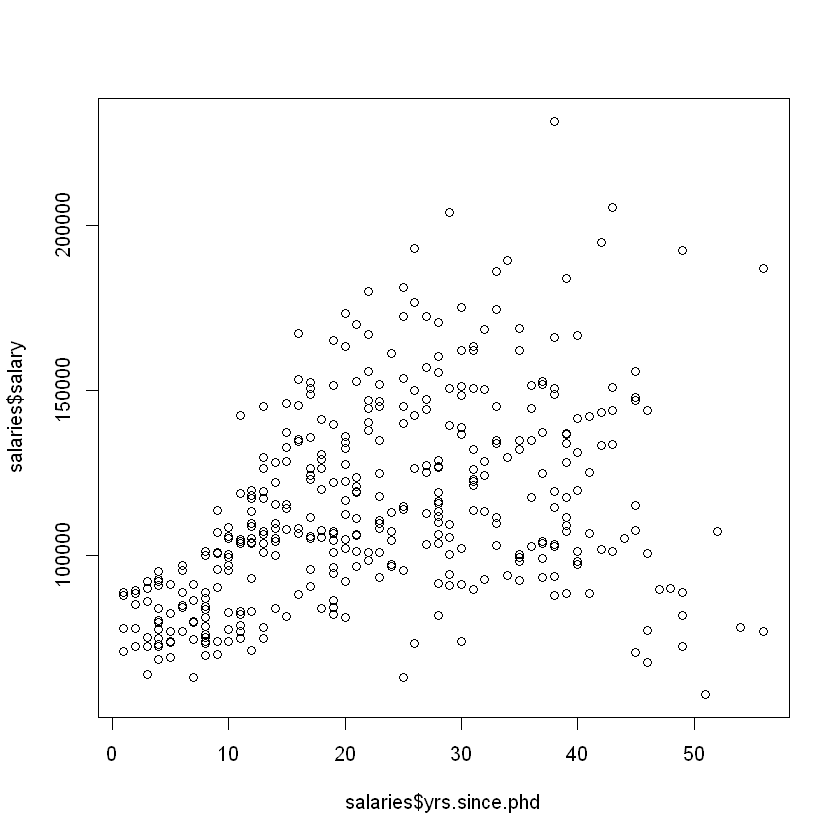

In [5]:
# Scatter plot comparison of 2 numerical data
plot(salaries$yrs.since.phd, salaries$salary)

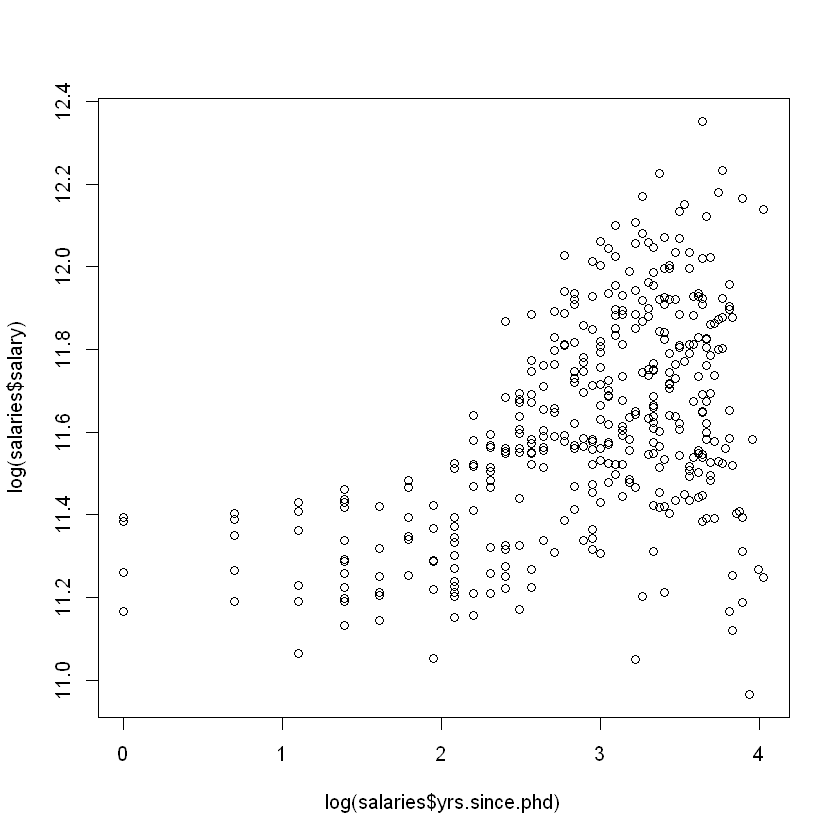

In [6]:
# Scatter plot comparison of 2 numerical data - Better Visualization
plot(log(salaries$yrs.since.phd), log(salaries$salary))

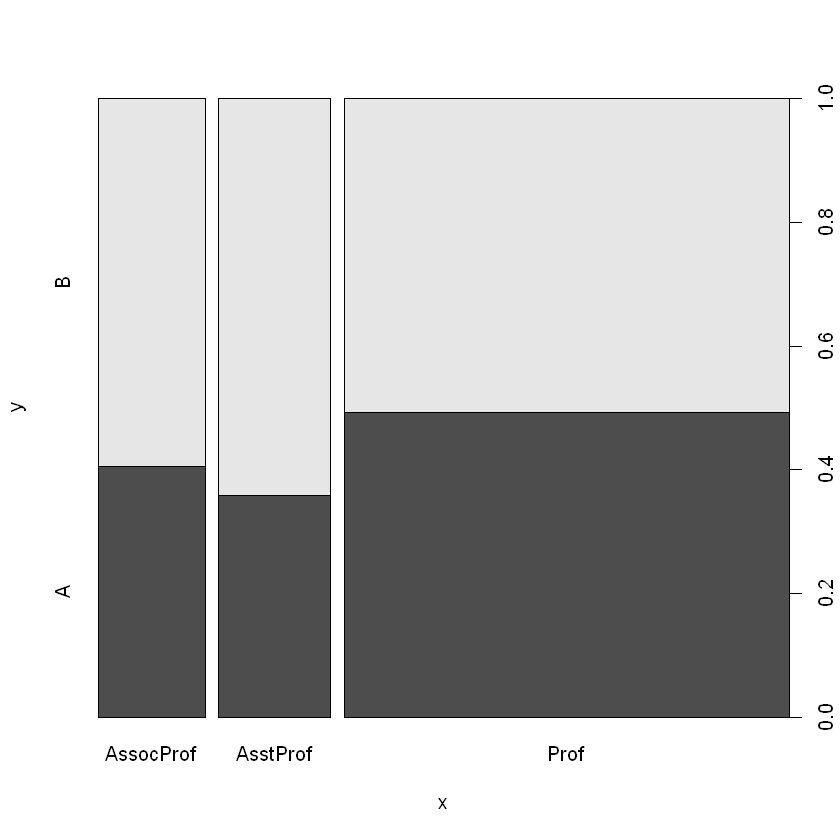

In [7]:
# Stacked Bar plot comparison of 2 numerical data
plot(salaries$rank, salaries$discipline)

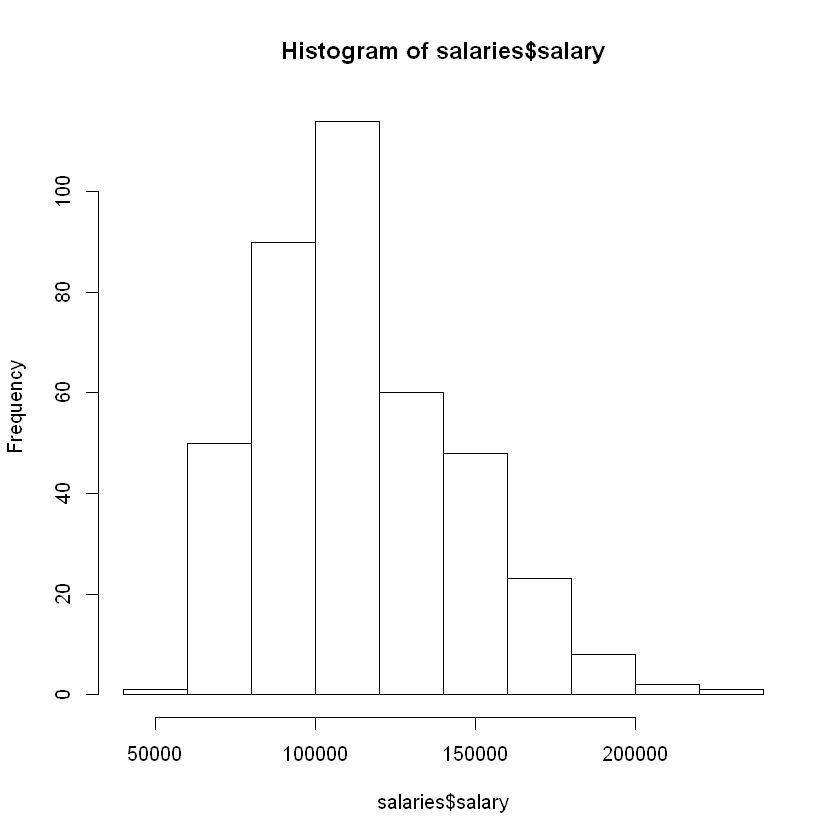

In [8]:
hist(salaries$salary, breaks=10)

## Customizing the Graphs

In [9]:
data(pressure)
str(pressure)

'data.frame':	19 obs. of  2 variables:
 $ temperature: num  0 20 40 60 80 100 120 140 160 180 ...
 $ pressure   : num  0.0002 0.0012 0.006 0.03 0.09 0.27 0.75 1.85 4.2 8.8 ...


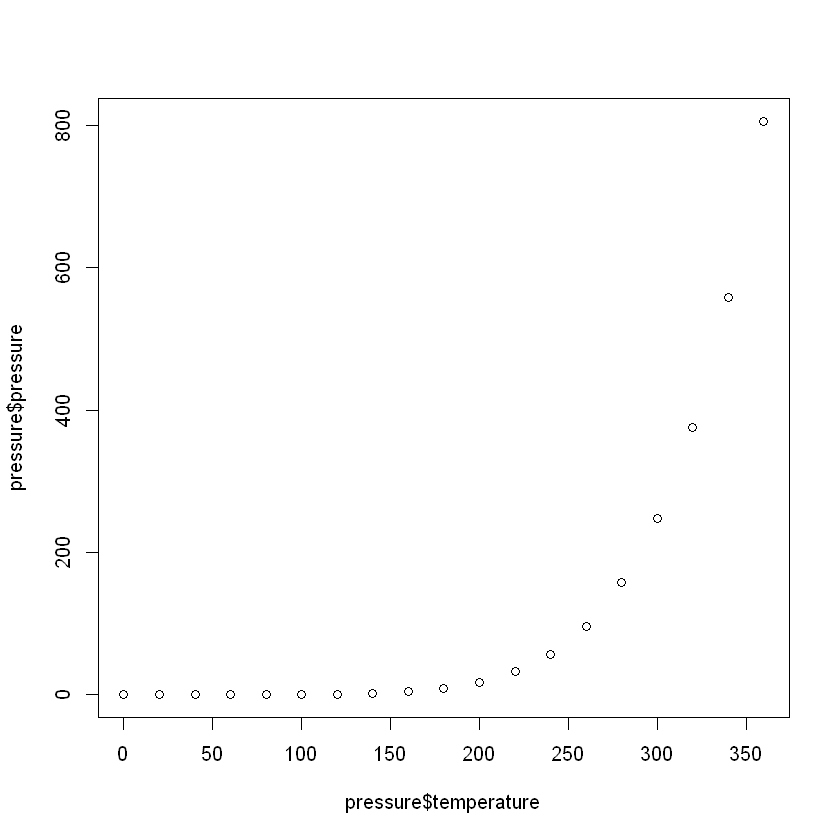

In [10]:
plot(pressure$temperature, pressure$pressure)

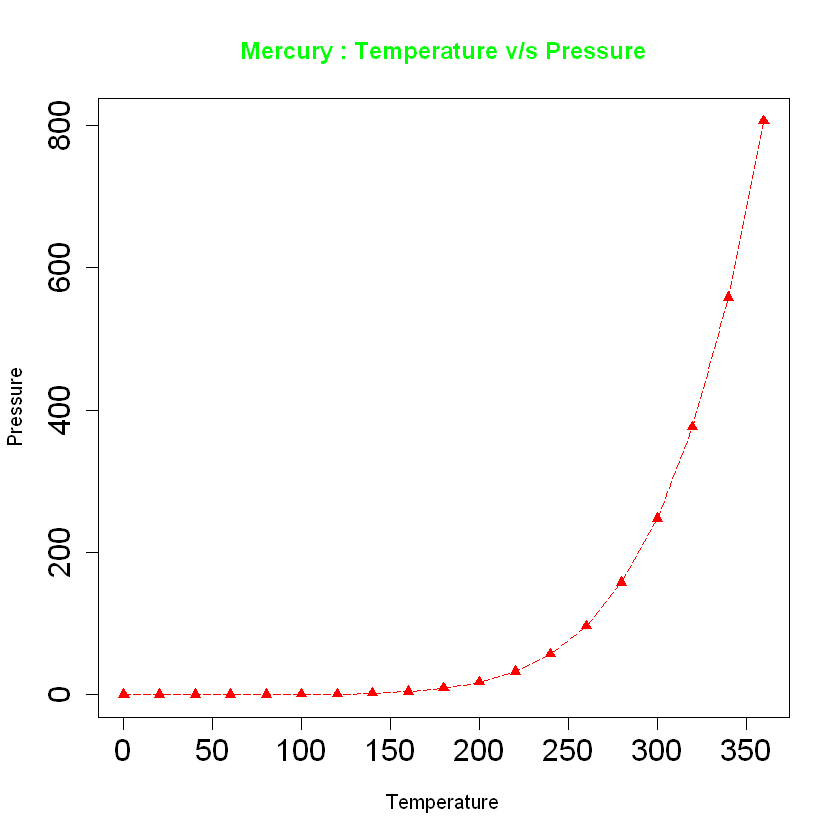

In [11]:
plot(pressure$temperature, pressure$pressure, xlab="Temperature", ylab="Pressure", main="Mercury : Temperature v/s Pressure", 
     type="o", col="red", col.main="green", cex.axis=1.5, lty=5, pch=17)

## How to plot Multiple graphs ?

In [12]:
lung = read.csv("LungCapData.csv")
head(lung)

LungCap,Age,Height,Smoke,Gender,Caesarean
6.475,6,62.1,no,male,no
10.125,18,74.7,yes,female,no
9.550,16,69.7,no,female,yes
11.125,14,71.0,no,male,no
4.800,5,56.9,no,male,no
6.225,11,58.7,no,female,no


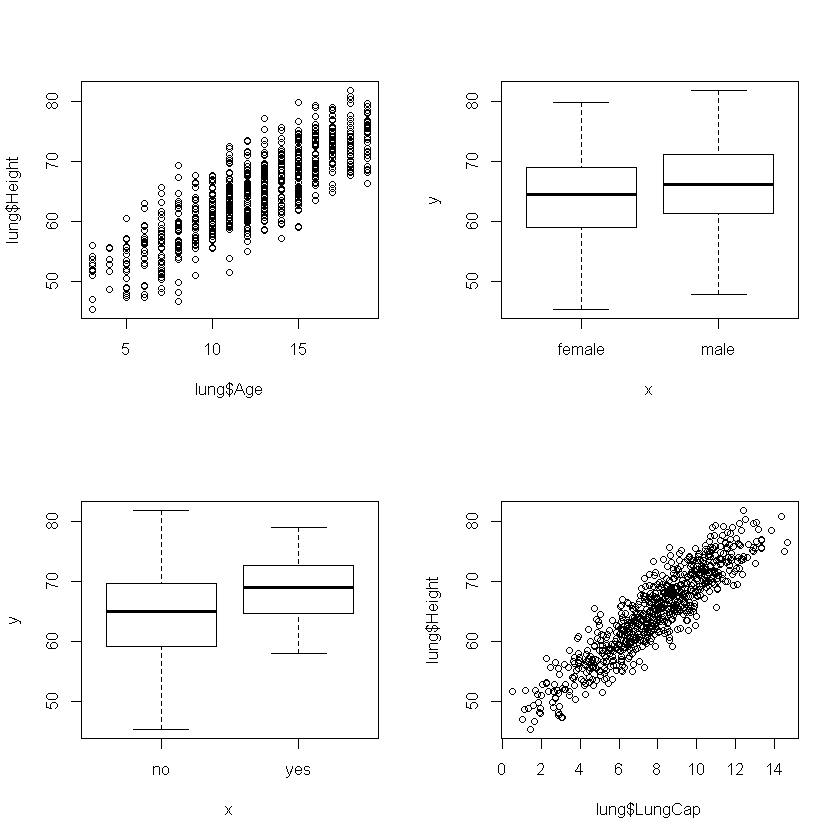

In [13]:
par(mfrow=c(2,2))
plot(lung$Age, lung$Height)
plot(lung$Gender, lung$Height)
plot(lung$Smoke, lung$Height)
plot(lung$LungCap, lung$Height)

## Barcharts and Piecharts

In [14]:
attach(lung)

In [15]:
names(lung)

[1] "LungCap"   "Age"       "Height"    "Smoke"     "Gender"    "Caesarean"

In [16]:
count = table(Gender)
count

Gender
female   male 
   358    367 

In [17]:
percent = table(Gender)/725
percent

Gender
   female      male 
0.4937931 0.5062069 

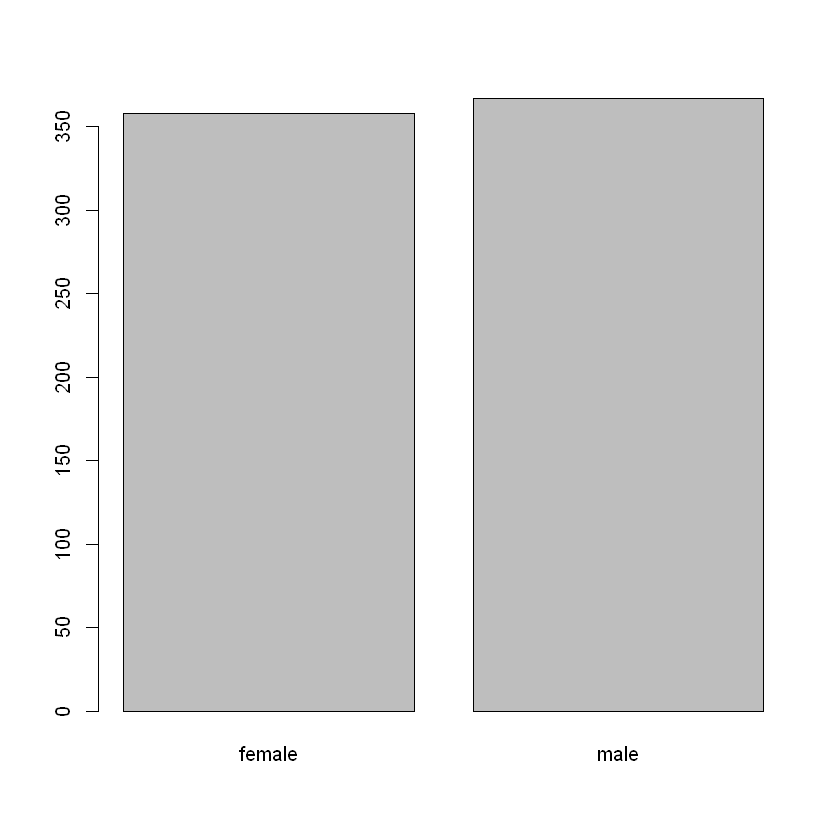

In [18]:
barplot(count)

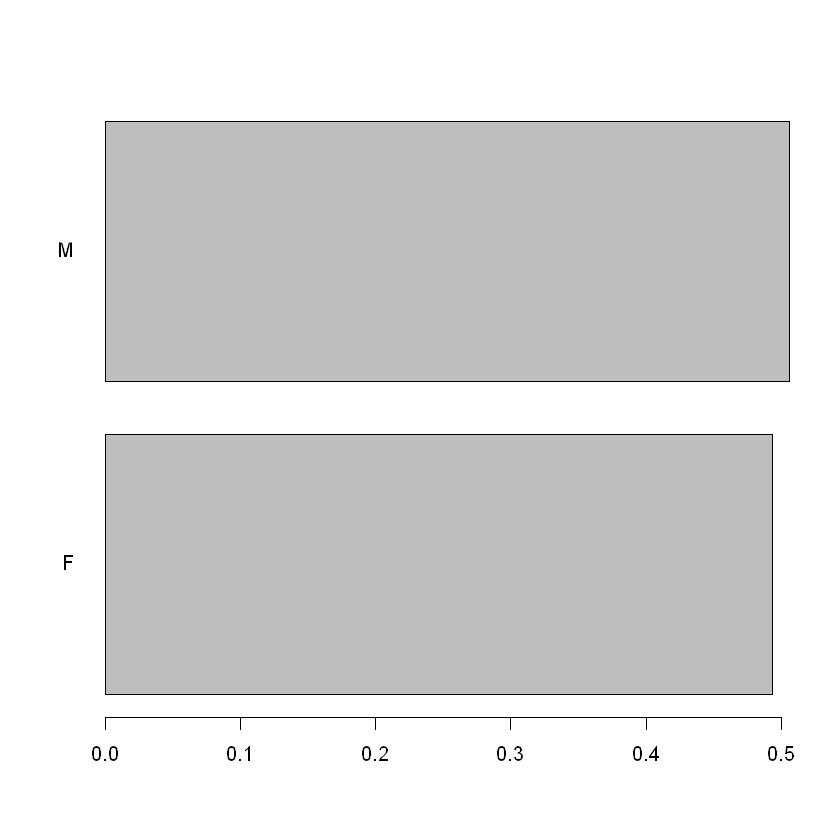

In [19]:
# las rotates the Y axis labels from vetical to horizontal
# names.arg sets names for bars in X axis
# horiz will make the bars horizontal
barplot(percent, las=1, names.arg=c("F", "M"), horiz=TRUE)

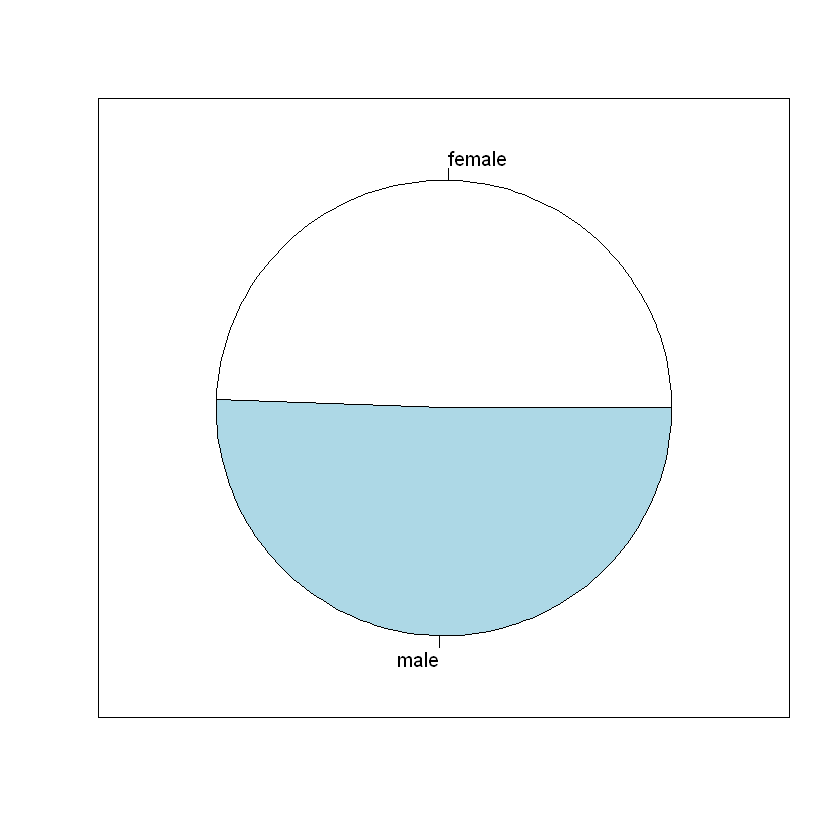

In [20]:
# Pie chart
pie(count)
# Add a box around resulting graph
box()

## Stratified Box-Plots
Box Plots with two factors/categories

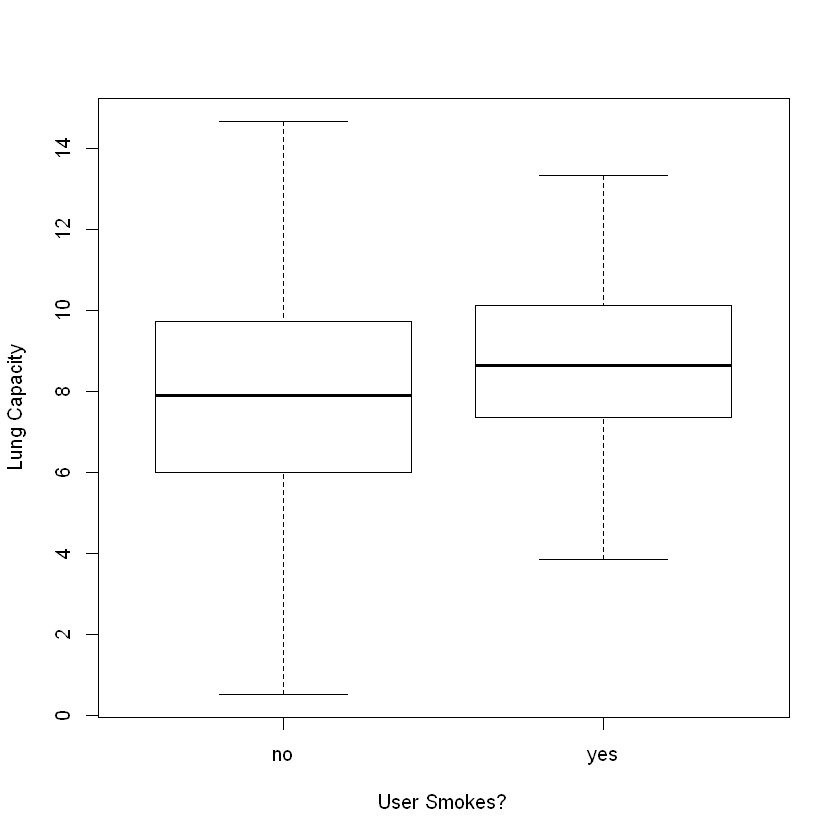

In [22]:
boxplot(LungCap~Smoke, xlab="User Smokes?", ylab="Lung Capacity")

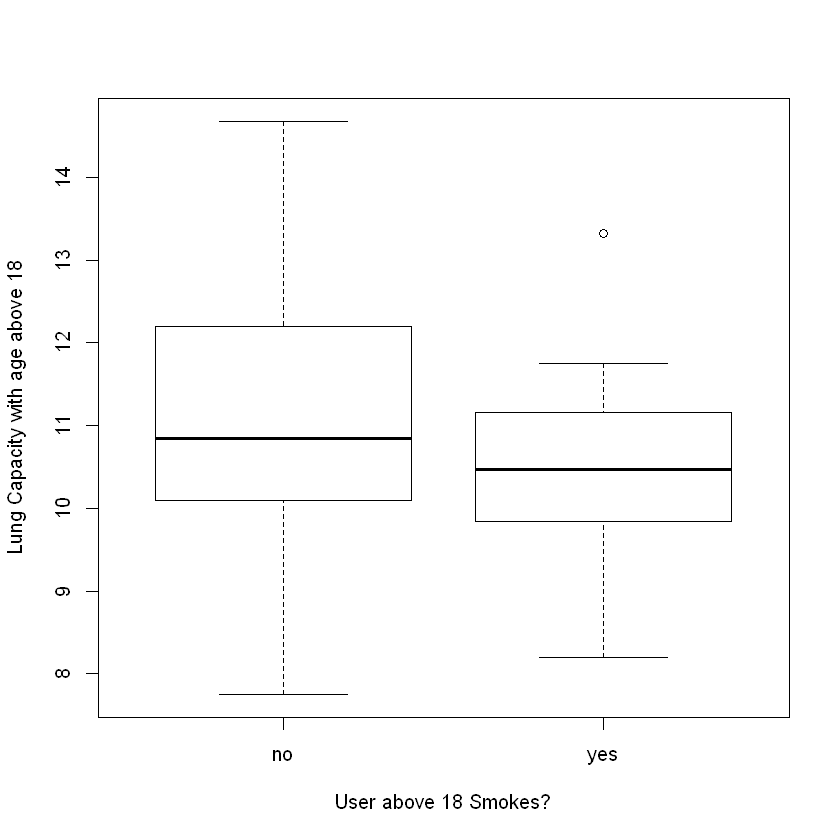

In [24]:
boxplot(LungCap[Age>=18]~Smoke[Age>=18], xlab="User above 18 Smokes?", ylab="Lung Capacity with age above 18")

In [26]:
AgeGroups = cut(Age, breaks=c(0,13,15,17,25), labels=c("<13", "14/15", "16/17", "18+"))
levels(AgeGroups)

[1] "<13"   "14/15" "16/17" "18+"

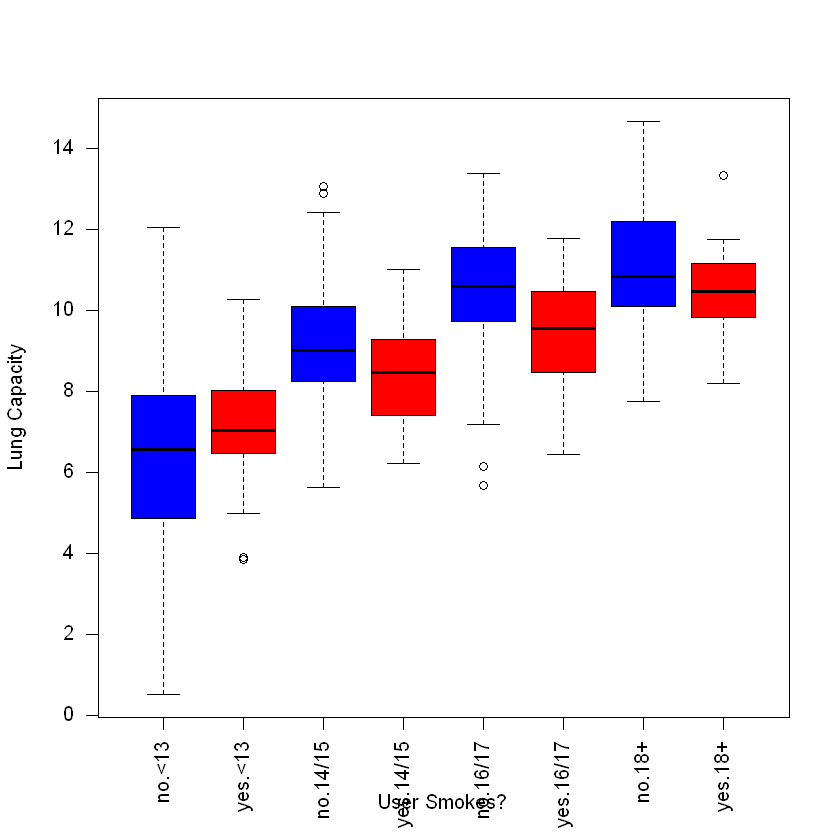

In [30]:
boxplot(LungCap~Smoke*AgeGroups, xlab="User Smokes?", ylab="Lung Capacity",las=2, col=c(4,2))

## Notched Boxplots

Warning message in bxp(list(stats = structure(c(8.2, 9.7, 12.25, 16.5, 21.5, 4.2, :
"some notches went outside hinges ('box'): maybe set notch=FALSE"

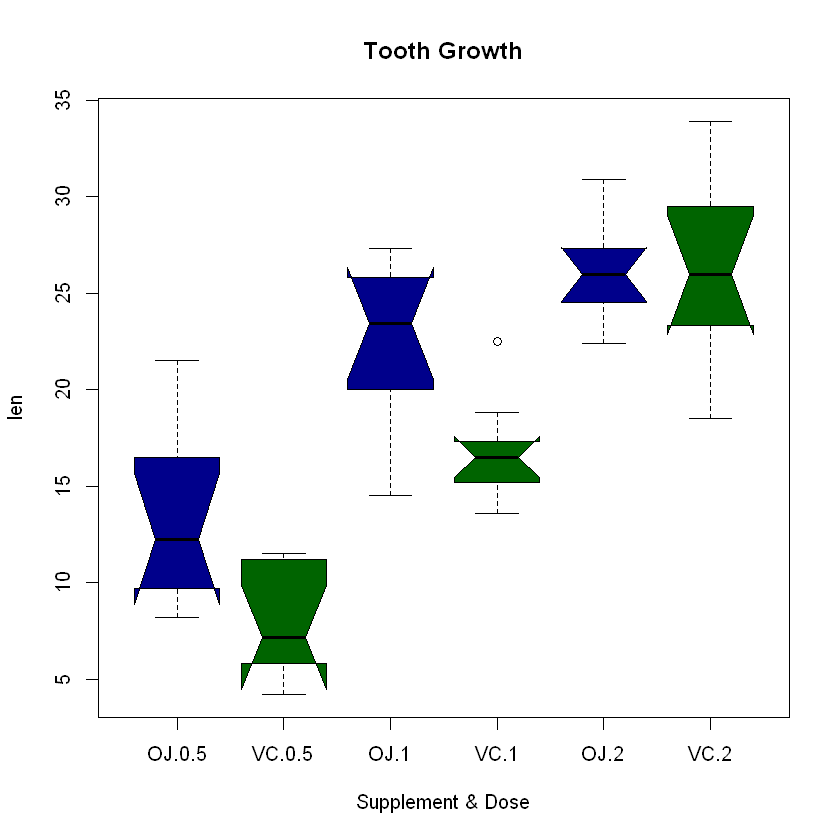

In [31]:
boxplot(len~supp*dose, data=ToothGrowth, notch=TRUE, col=(c("darkblue","darkgreen")),main="Tooth Growth", xlab="Supplement & Dose")

## Scatterplot

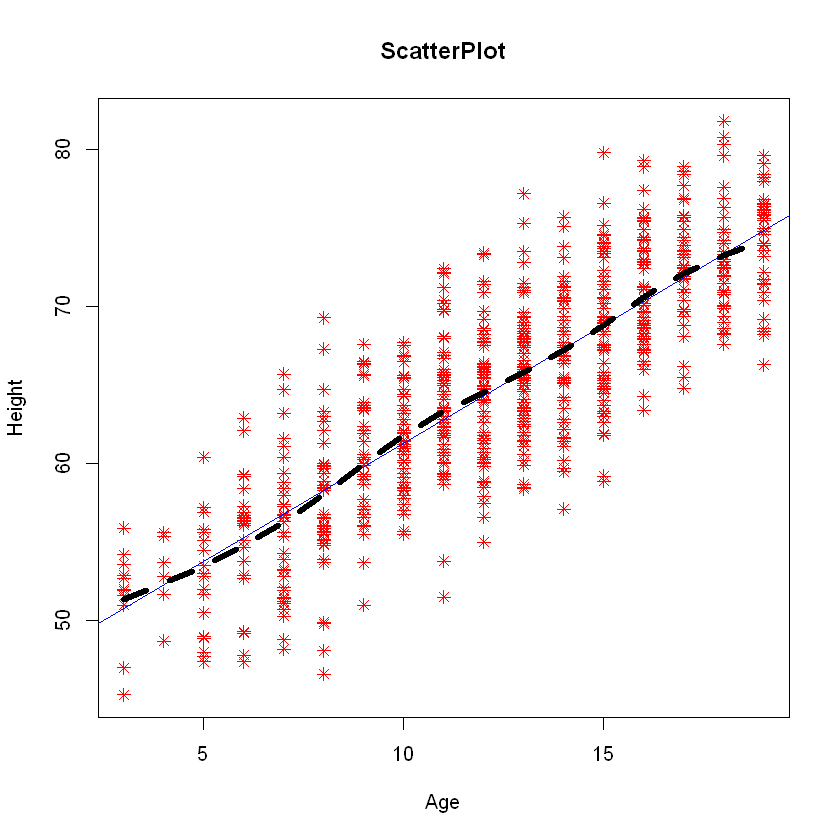

In [42]:
plot(Age, Height, main="ScatterPlot", pch=8, col=2)
abline(lm(Height~Age), col=4)
lines(smooth.spline(Age, Height), lw = 5, lty=2)

## Add text to plots

In [2]:
lung = read.csv("LungCapData.csv")
attach(lung)

In [3]:
names(lung)

[1] "LungCap"   "Age"       "Height"    "Smoke"     "Gender"    "Caesarean"

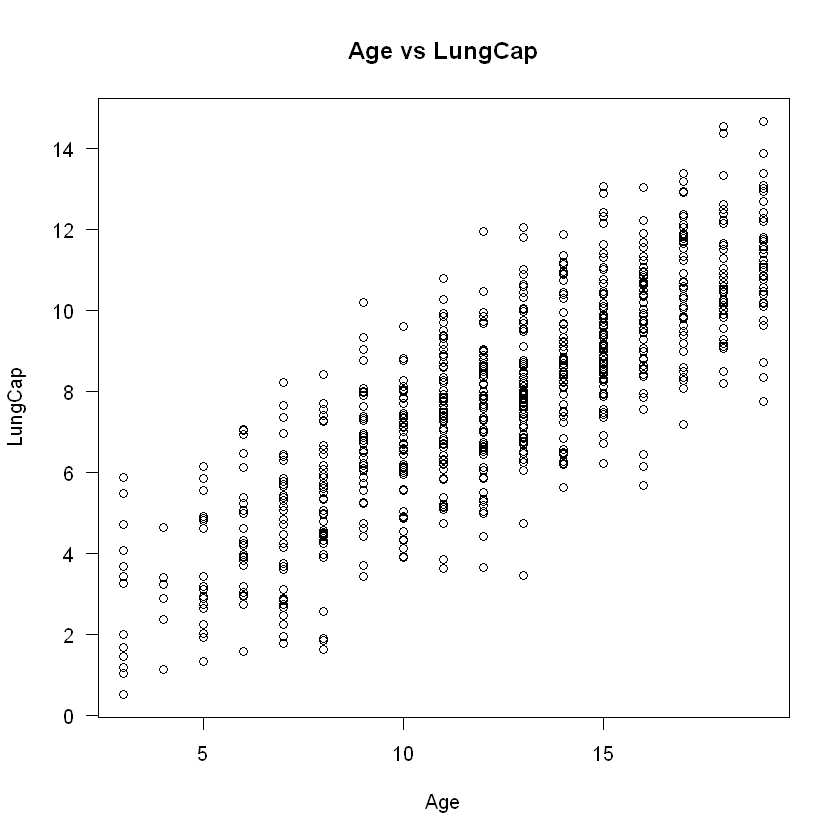

In [5]:
plot(Age, LungCap, main="Age vs LungCap", las=1)

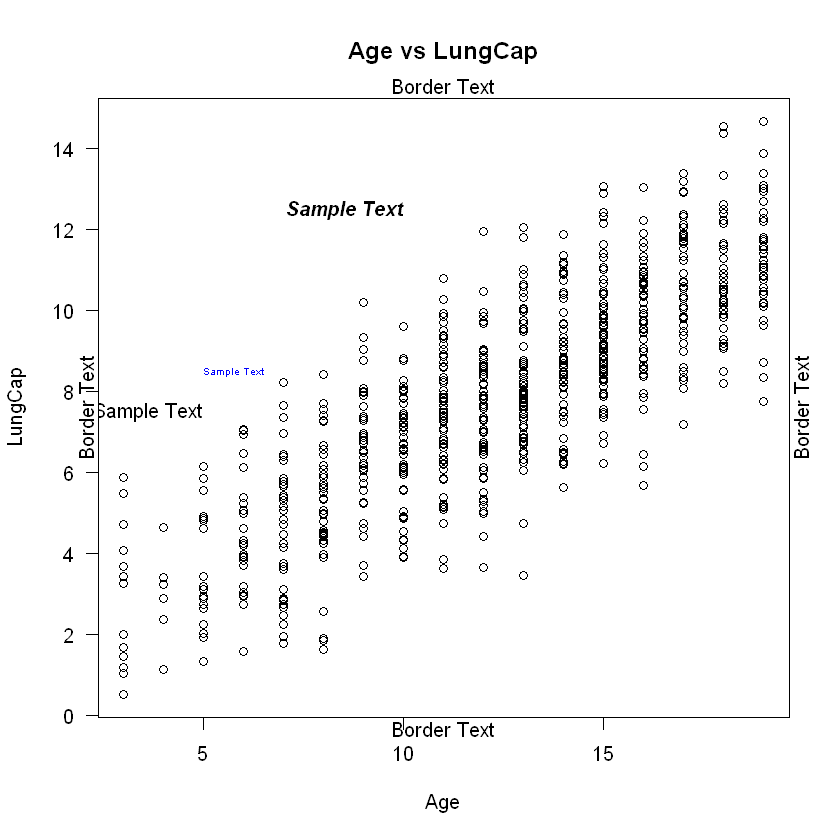

In [16]:
plot(Age, LungCap, main="Age vs LungCap", las=1)
text(x=5, y=7.5, label="Sample Text", adj=1)
text(x=5, y=8.5, label="Sample Text", adj=0, cex=0.5, col=4)
text(x=10, y=12.5, label="Sample Text", adj=1, font=4)
mtext(text="Border Text", side=1)
mtext(text="Border Text", side=2)
mtext(text="Border Text", side=3)
mtext(text="Border Text", side=4)

## Add legened to plot

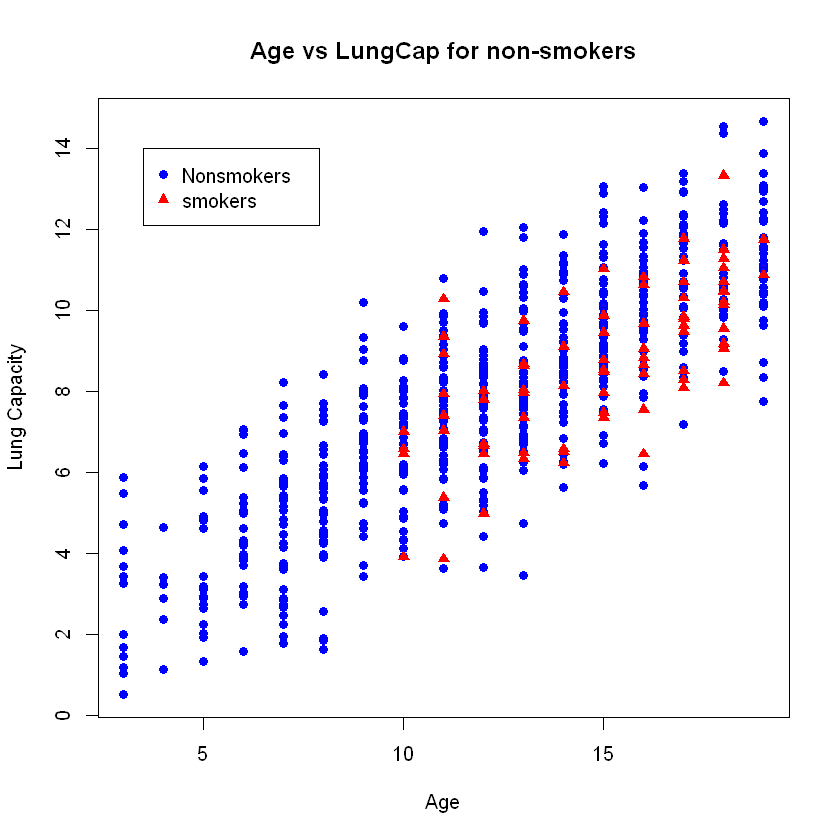

In [21]:
plot(Age[Smoke=="no"], LungCap[Smoke=="no"], main="Age vs LungCap for non-smokers", col=4, xlab="Age", ylab="Lung Capacity", pch=16)
points(Age[Smoke=="yes"], LungCap[Smoke=="yes"], col=2, pch=17)
legend(x=3.5, y=14, legend=c("Nonsmokers", "smokers"), col=c(4,2), pch=c(16,17))

## Lattice Plots
Hope you had good learning about the basic plots!

Now you will be focusing on the package `lattice` that provides powerful and elegant high-level data visualization with an emphasis on multivariate data.

`lattice` has been designed to meet most typical graphics needs with minimal tuning, but can also be easily extended to handle most nonstandard requirements.

In [1]:
# Lattice Examples
library(lattice)
attach(mtcars)

In [2]:
# create factors with value labels
gear.f<-factor(gear,levels=c(3,4,5),
   labels=c("3gears","4gears","5gears"))
cyl.f <-factor(cyl,levels=c(4,6,8),
   labels=c("4cyl","6cyl","8cyl"))

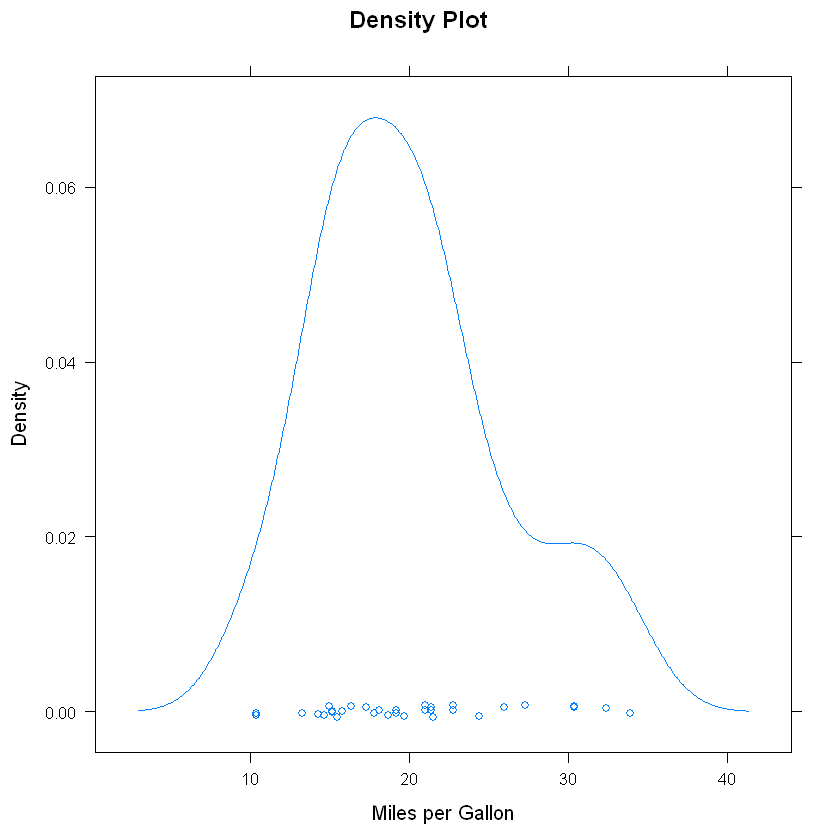

In [3]:
# kernel density plot
densityplot(~mpg,
   main="Density Plot",
   xlab="Miles per Gallon")

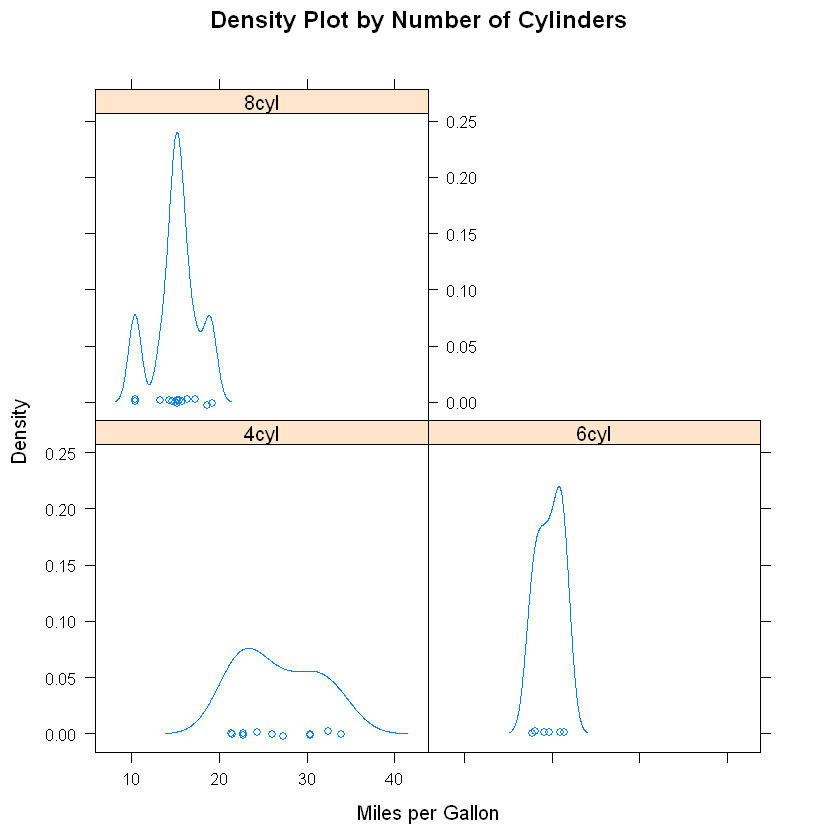

In [4]:
# kernel density plots by factor level
densityplot(~mpg|cyl.f,
   main="Density Plot by Number of Cylinders",
   xlab="Miles per Gallon")

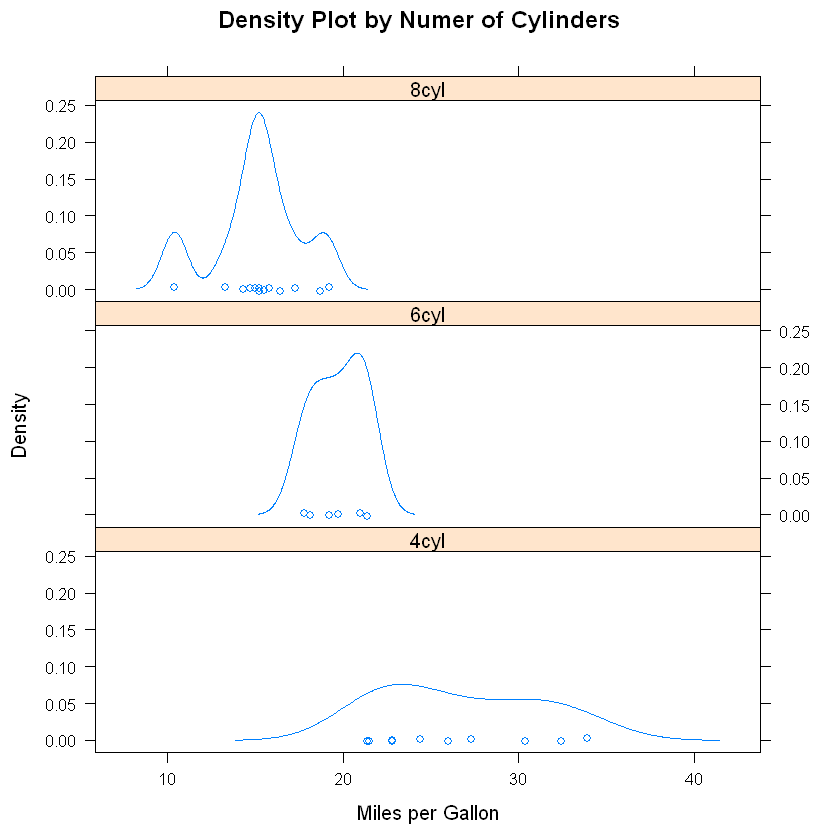

In [5]:
# kernel density plots by factor level (alternate layout)
densityplot(~mpg|cyl.f,
   main="Density Plot by Numer of Cylinders",
   xlab="Miles per Gallon",
   layout=c(1,3))

In [6]:
# boxplots for each combination of two factors
bwplot(cyl.f~mpg|gear.f,
   ylab="Cylinders", xlab="Miles per Gallon",
   main="Mileage by Cylinders and Gears",
   layout=(c(1,3))

ERROR: Error in parse(text = x, srcfile = src): <text>:6:0: unexpected end of input
4:    main="Mileage by Cylinders and Gears",
5:    layout=(c(1,3))
  ^


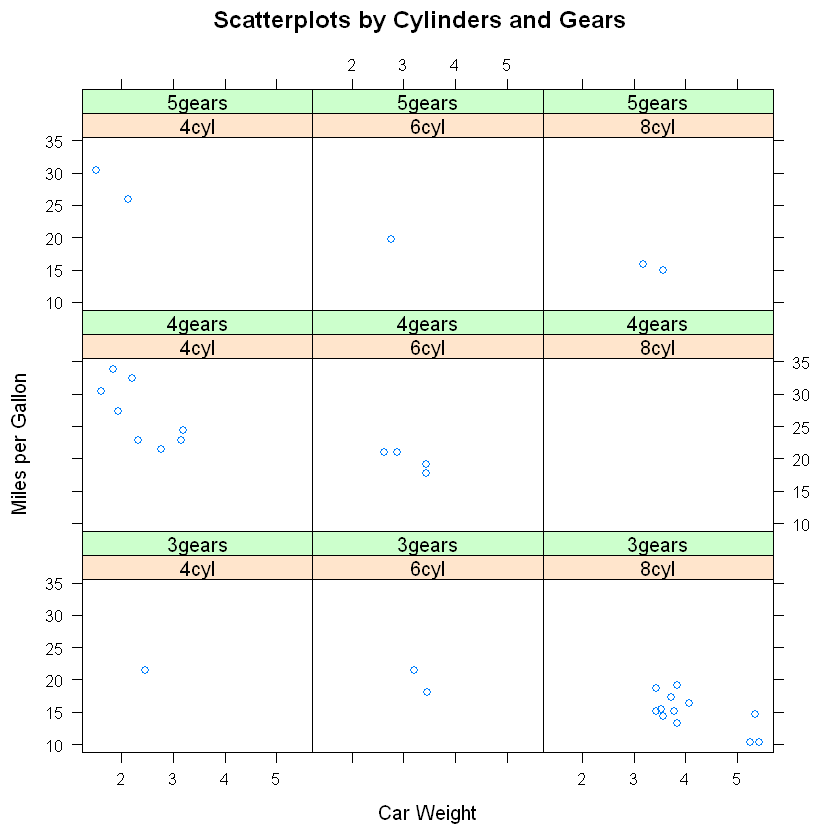

In [7]:
# scatterplots for each combination of two factors
xyplot(mpg~wt|cyl.f*gear.f,
   main="Scatterplots by Cylinders and Gears",
   ylab="Miles per Gallon", xlab="Car Weight")

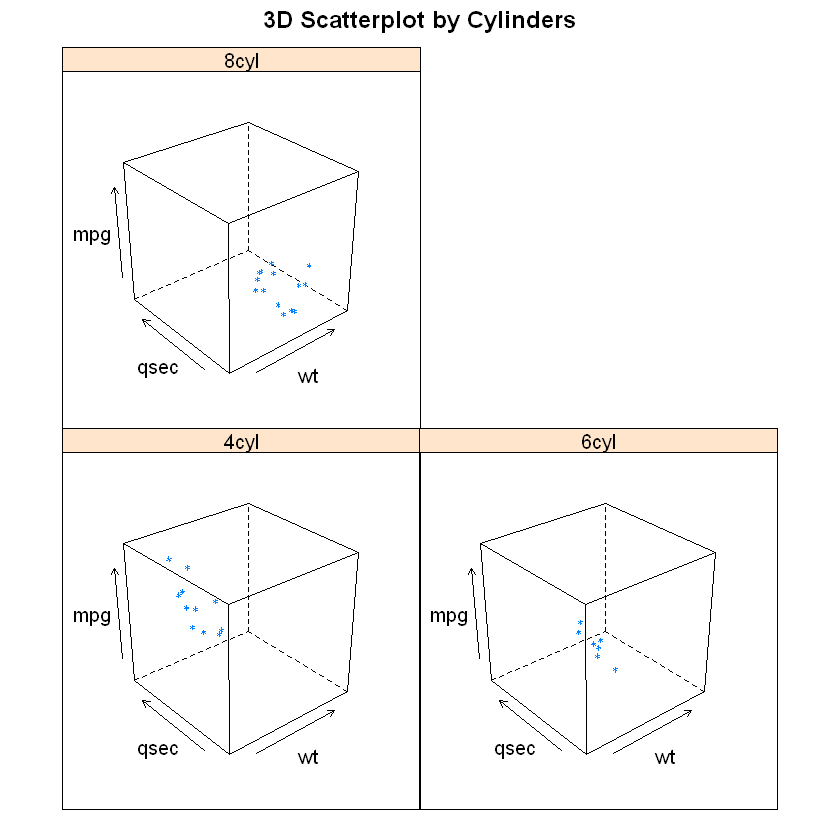

In [8]:
# 3d scatterplot by factor level
cloud(mpg~wt*qsec|cyl.f,
   main="3D Scatterplot by Cylinders")

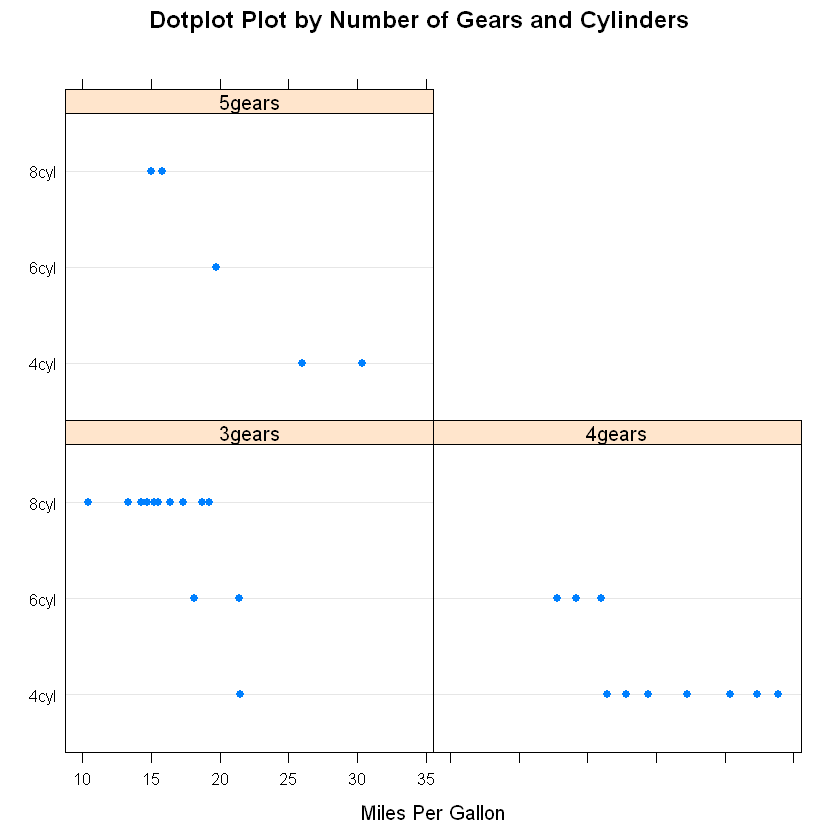

In [9]:
# dotplot for each combination of two factors
dotplot(cyl.f~mpg|gear.f,
   main="Dotplot Plot by Number of Gears and Cylinders",
   xlab="Miles Per Gallon")

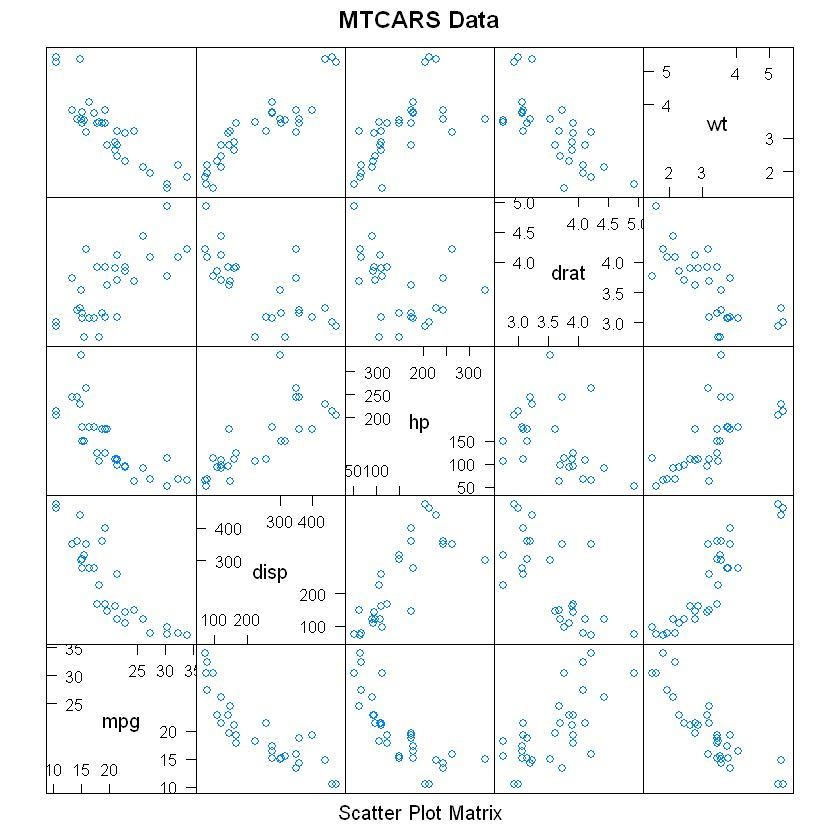

In [10]:
# scatterplot matrix
splom(mtcars[c(1,3,4,5,6)],
   main="MTCARS Data")

The following object is masked from package:ggplot2:

    mpg

The following objects are masked from mtcars (pos = 4):

    am, carb, cyl, disp, drat, gear, hp, mpg, qsec, vs, wt

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"span too small.   fewer data values than degrees of freedom."Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"pseudoinverse used at 3.1666"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"neighborhood radius 0.40335"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"reciprocal condition number  0"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"There are other near singularities as well. 0.07472"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"zero-width neighborhood. make span bigger"Warning message in simpleLoess(y, x, w, span, degree = degree

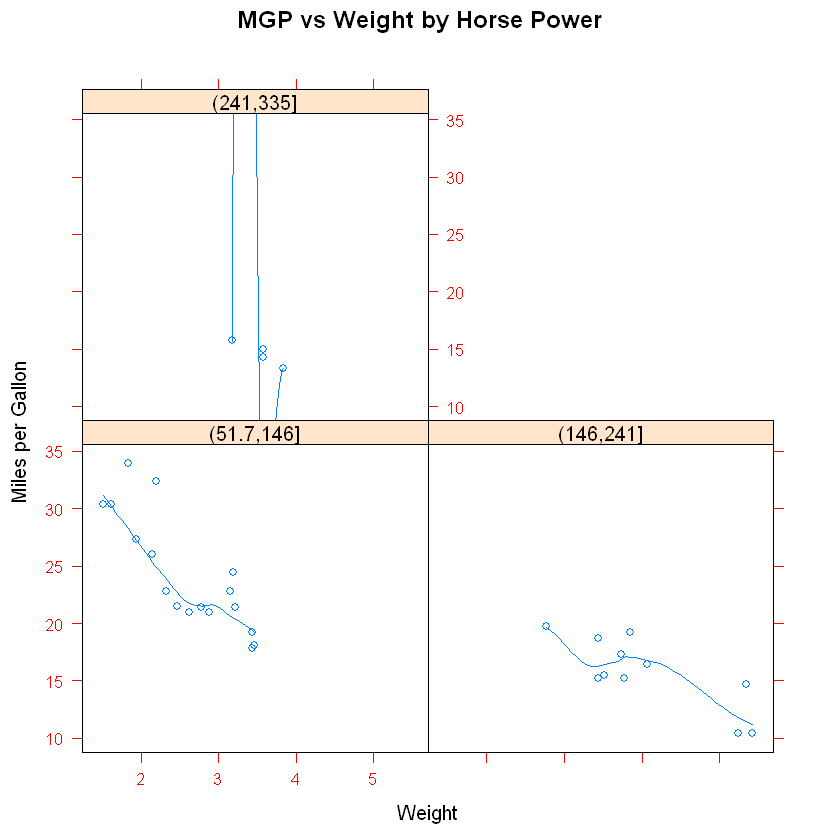

In [13]:
# Customized Lattice Example
library(lattice)
panel.smoother <- function(x, y) {
  panel.xyplot(x, y) # show points
  panel.loess(x, y)  # show smoothed line
}
attach(mtcars)
hp <- cut(hp,3) # divide horse power into three bands
xyplot(mpg~wt|hp, scales=list(cex=.8, col="red"),
   panel=panel.smoother,
   xlab="Weight", ylab="Miles per Gallon",
   main="MGP vs Weight by Horse Power")

## ggplot2 - Visualization
Now we will focus on `ggplot2` package, which is advanced to lattice. This was created based on the concept "The Grammar of Graphics".

When you provide the data, tell `ggplot2` how to map variables to aesthetics, what graphical primitives to use, and see how `ggplot2` is able to plot with ease based on the details provided. We will learn how `ggplot2` works in this section!

In [14]:
## Install the package ggplot2 by using the following commands

#install.packages("ggplot2")
library(ggplot2)

# Load the data
data(mtcars)
df <- mtcars[, c("mpg", "cyl", "wt")]

# Convert cyl to a factor variable
df$cyl <- as.factor(df$cyl)
head(df)

,mpg,cyl,wt
Mazda RX4,21.0,6,2.620
Mazda RX4 Wag,21.0,6,2.875
Datsun 710,22.8,4,2.320
Hornet 4 Drive,21.4,6,3.215
Hornet Sportabout,18.7,8,3.440
Valiant,18.1,6,3.460


### qplot(): Quick plot with ggplot2
The qplot() function is very similar to the standard R plot() function. It can be used to create quickly and easily different types of graphs: scatter plots, box plots, violin plots, histogram and density plots.

A simplified format of qplot() is :

qplot(x, y = NULL, data, geom="auto")

### Scatter plots
The R code below creates basic scatter plots using the argument geom = “point”. It’s also possible to combine different geoms (e.g.: geom = c(“point”, “smooth”)).

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


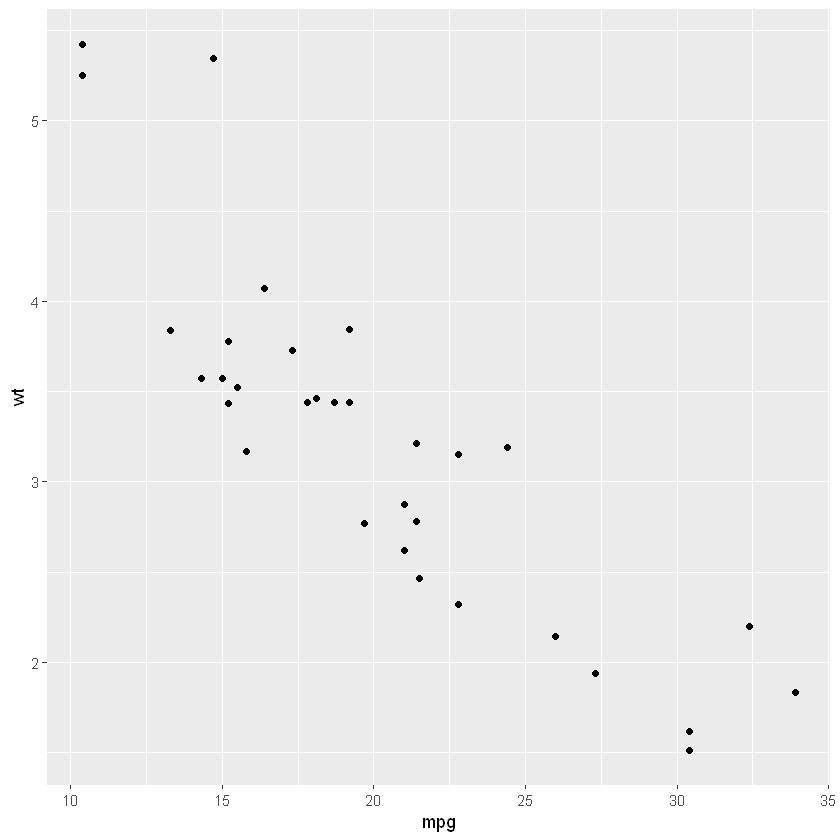

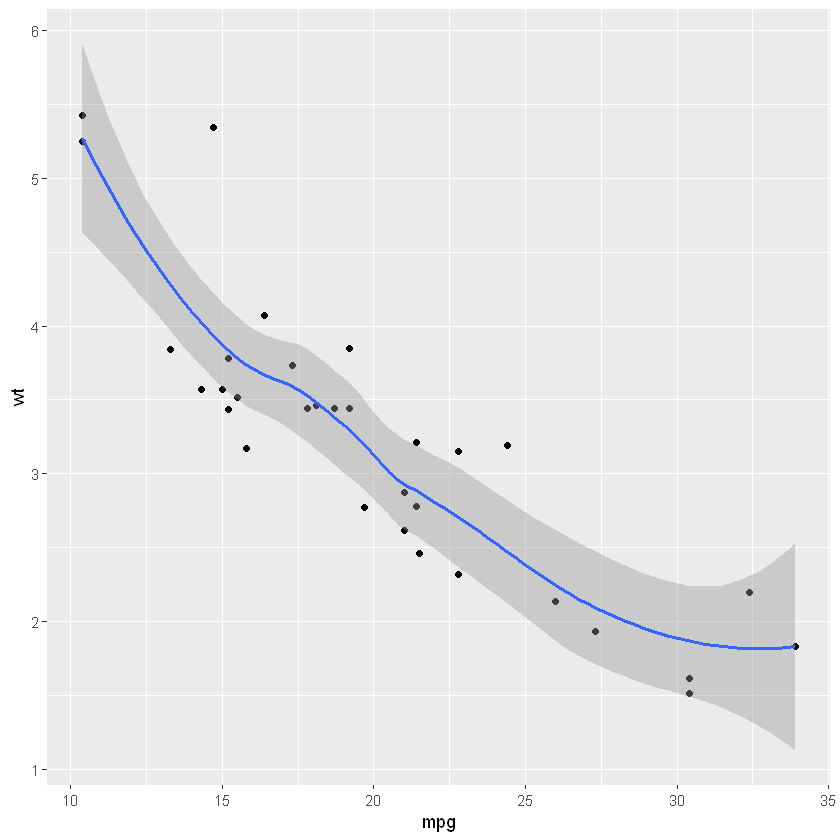

In [17]:
# Basic scatter plot
qplot(x = mpg, y = wt, data = df, geom = "point")
# Scatter plot with smoothed line
qplot(mpg, wt, data = df, 
      geom = c("point", "smooth"))

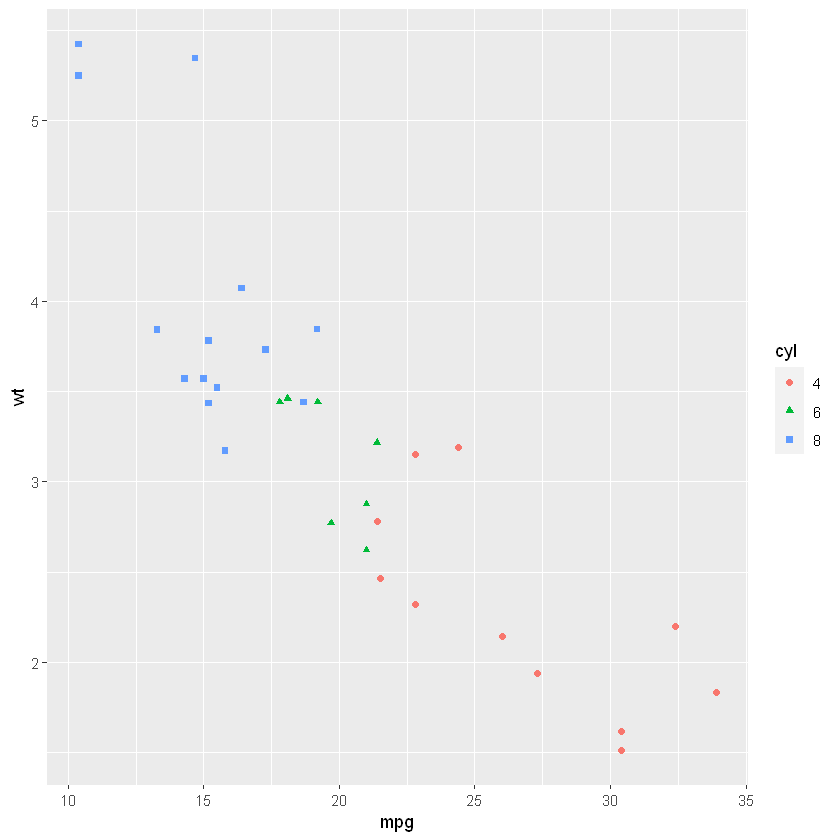

In [18]:
# The following R code will change the color and the shape of points by groups. 
# The column cyl will be used as grouping variable. 
# In other words, the color and the shape of points will be changed by the levels of cyl.
qplot(mpg, wt, data = df, colour = cyl, shape = cyl)

### Box plot, violin plot and dot plot
The R code below generates some data containing the weights by sex (M for male; F for female):

In [20]:
set.seed(1234)
wdata = data.frame(
        sex = factor(rep(c("F", "M"), each=200)),
        weight = c(rnorm(200, 55), rnorm(200, 58)))
head(wdata)

sex,weight
F,53.79293
F,55.27743
F,56.08444
F,52.65430
F,55.42912
F,55.50606


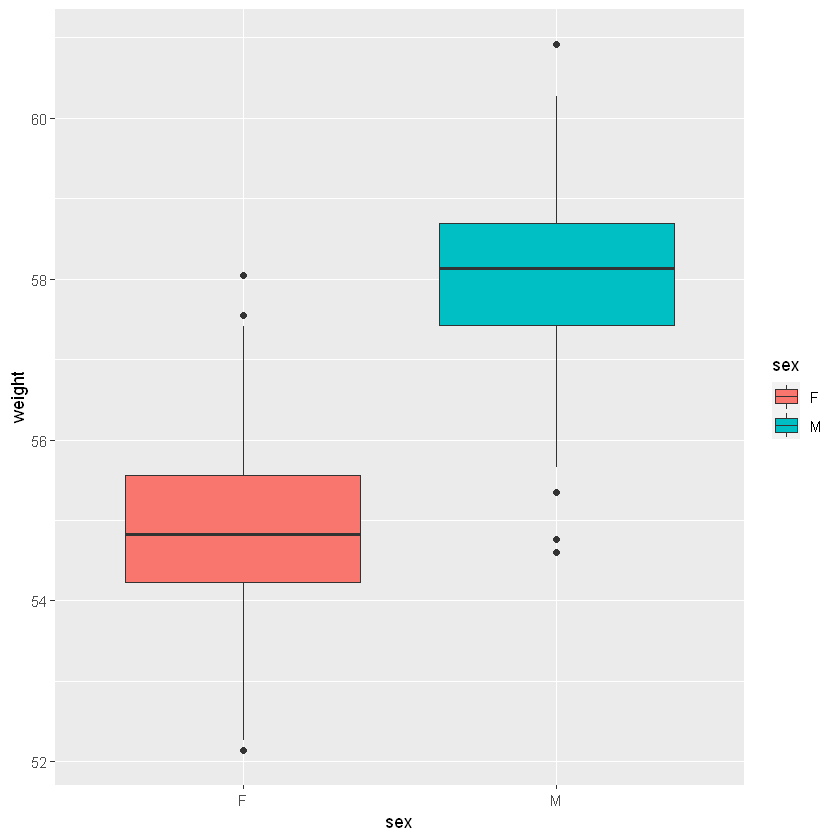

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.


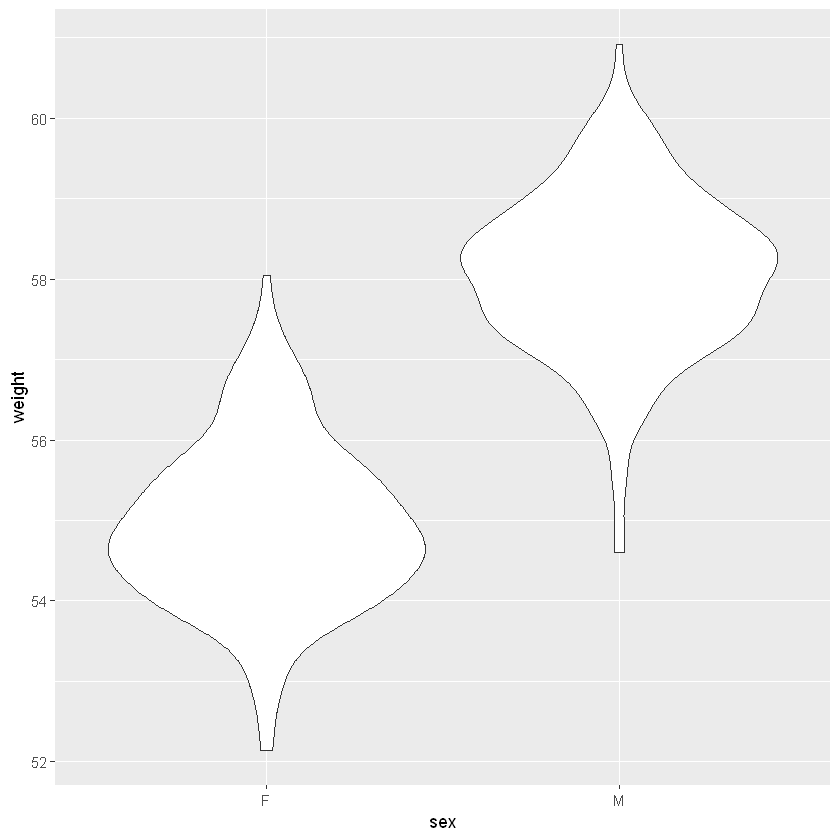

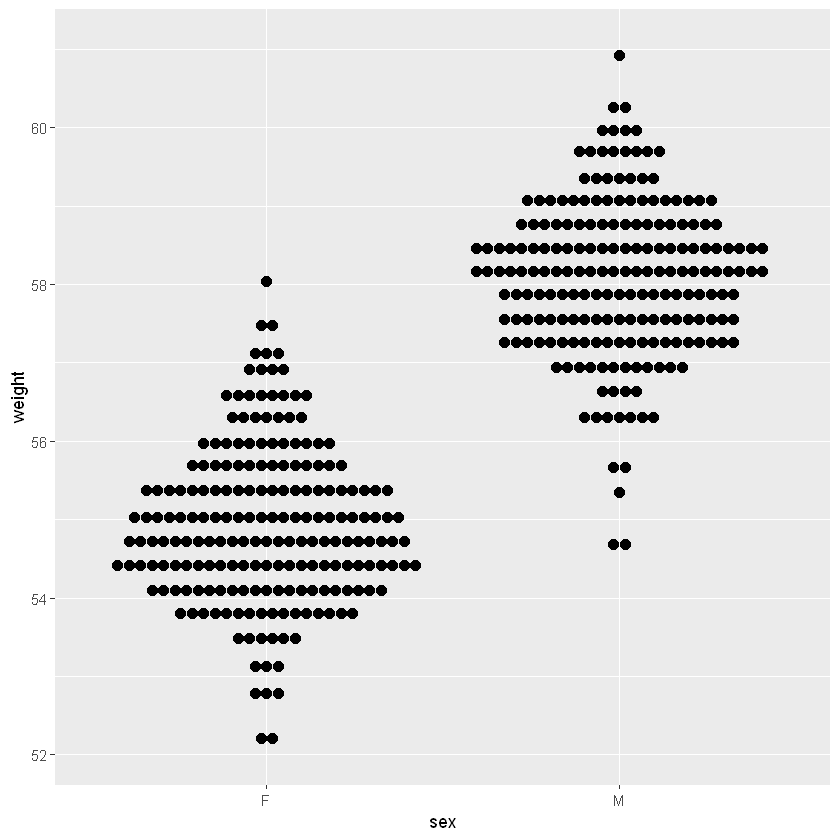

In [21]:
# Basic box plot from data frame
qplot(sex, weight, data = wdata, 
      geom= "boxplot", fill = sex)

# Violin plot
qplot(sex, weight, data = wdata, geom = "violin")

# Dot plot
qplot(sex, weight, data = wdata, geom = "dotplot",
      stackdir = "center", binaxis = "y", dotsize = 0.5)

### Histogram and density plots
The histogram and density plots are used to display the distribution of data.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


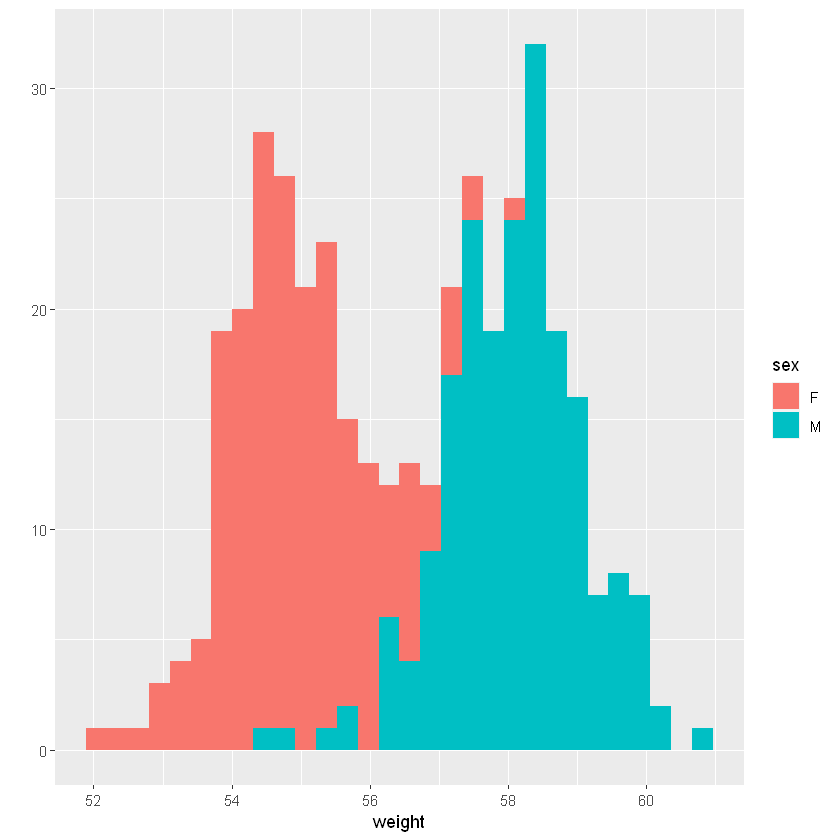

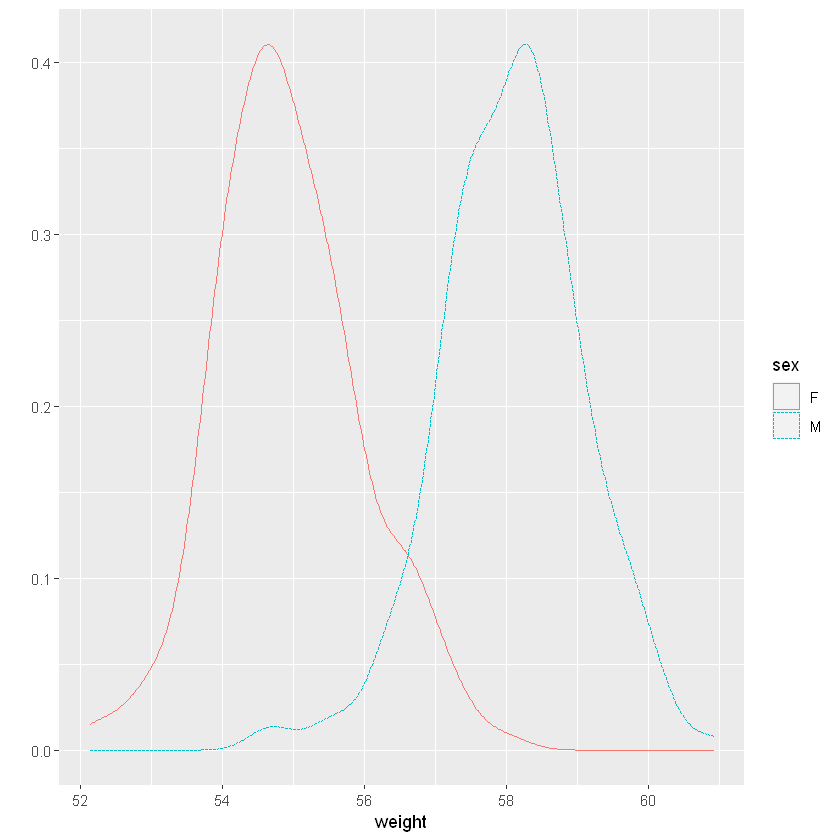

In [22]:
# Histogram  plot
# Change histogram fill color by group (sex)
qplot(weight, data = wdata, geom = "histogram",
      fill = sex)
# Density plot
# Change density plot line color by group (sex)
# change line type
qplot(weight, data = wdata, geom = "density",
    color = sex, linetype = sex)

## ggplot(): build plots piece by piece
As mentioned above, there are two main functions in ggplot2 package for generating graphics:

#### The quick and easy-to-use function: qplot()
The more powerful and flexible function to build plots piece by piece: ggplot()
This section describes briefly how to use the function ggplot(). Recall that, the concept of ggplot divides a plot into three different fundamental parts: plot = data + Aesthetics + geometry.

- data: a data frame.
- Aesthetics: used to specify x and y variables, color, size, shape, ….
- Geometry: the type of plots (histogram, boxplot, line, density, dotplot, bar, …)

To demonstrate how the function ggplot() works, we’ll draw a scatter plot. 
The function aes() is used to specify aesthetics. An alternative option is the function aes_string() which generates mappings from a string. aes_string() is particularly useful when writing functions that create plots because you can use strings to define the aesthetic mappings, rather than having to use substitute to generate a call to aes()

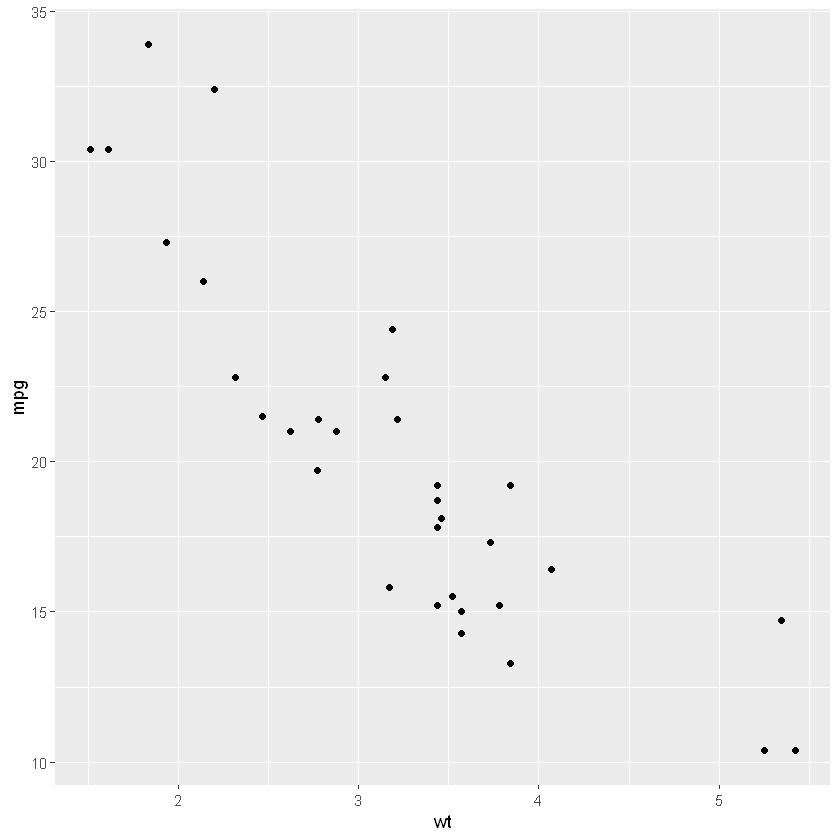

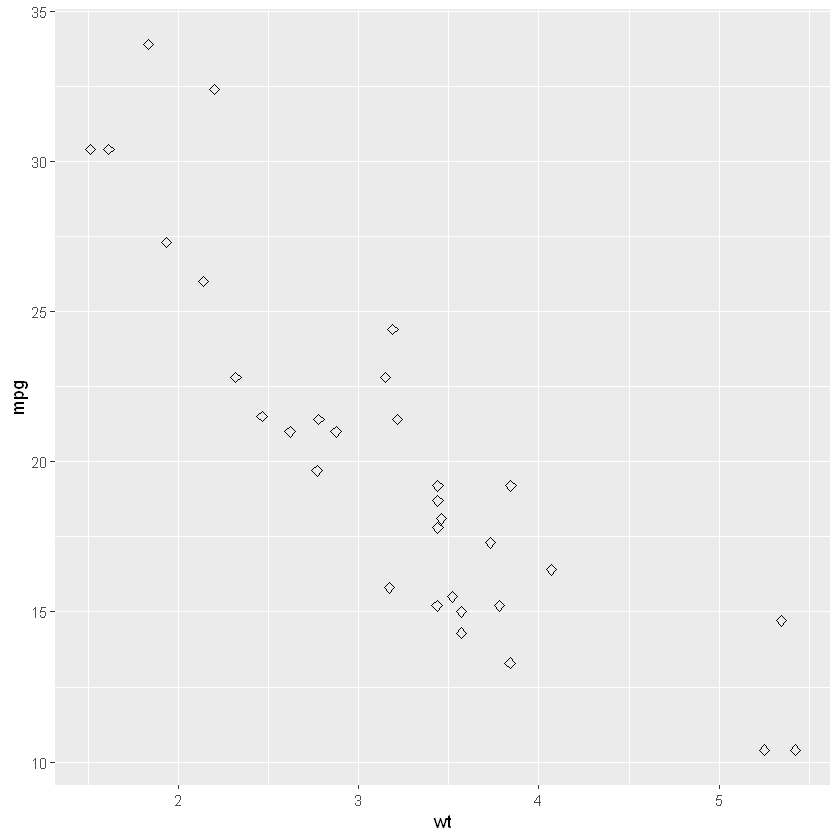

In [24]:
# Basic scatter plot
ggplot(data = mtcars, aes(x = wt, y = mpg)) + 
  geom_point()
# Change the point size, and shape
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point(size = 2, shape = 23)

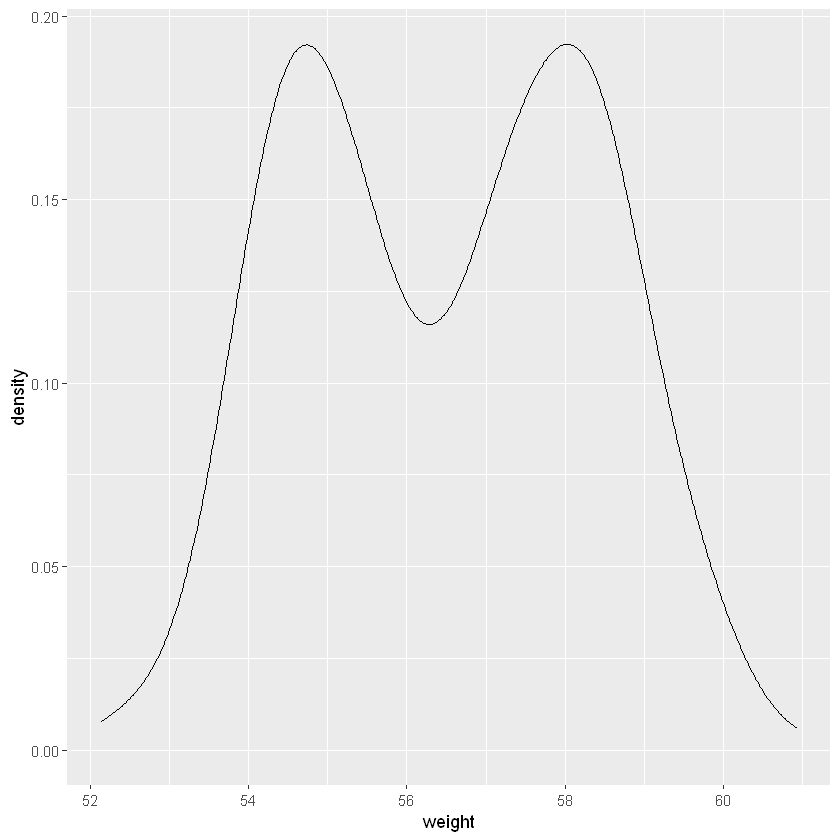

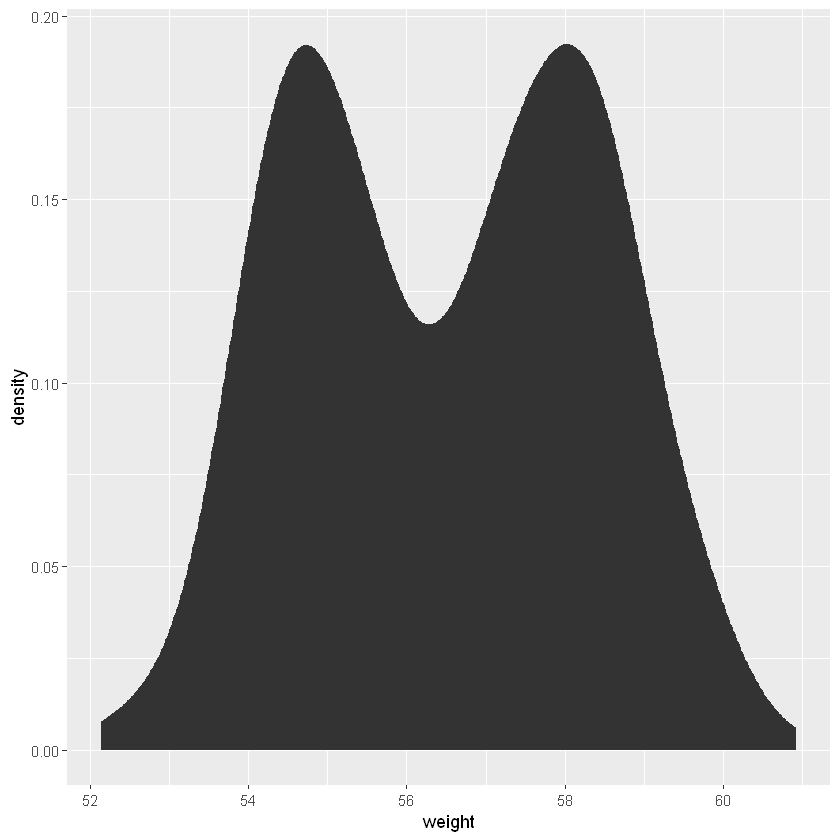

In [25]:
# Use geometry function
ggplot(wdata, aes(x = weight)) + geom_density()
# OR use stat function
ggplot(wdata, aes(x = weight)) + stat_density()